Summary Statistics (Percentage)
Mean: 54.83398736388737
Standard Deviation: 4.1702747441466395


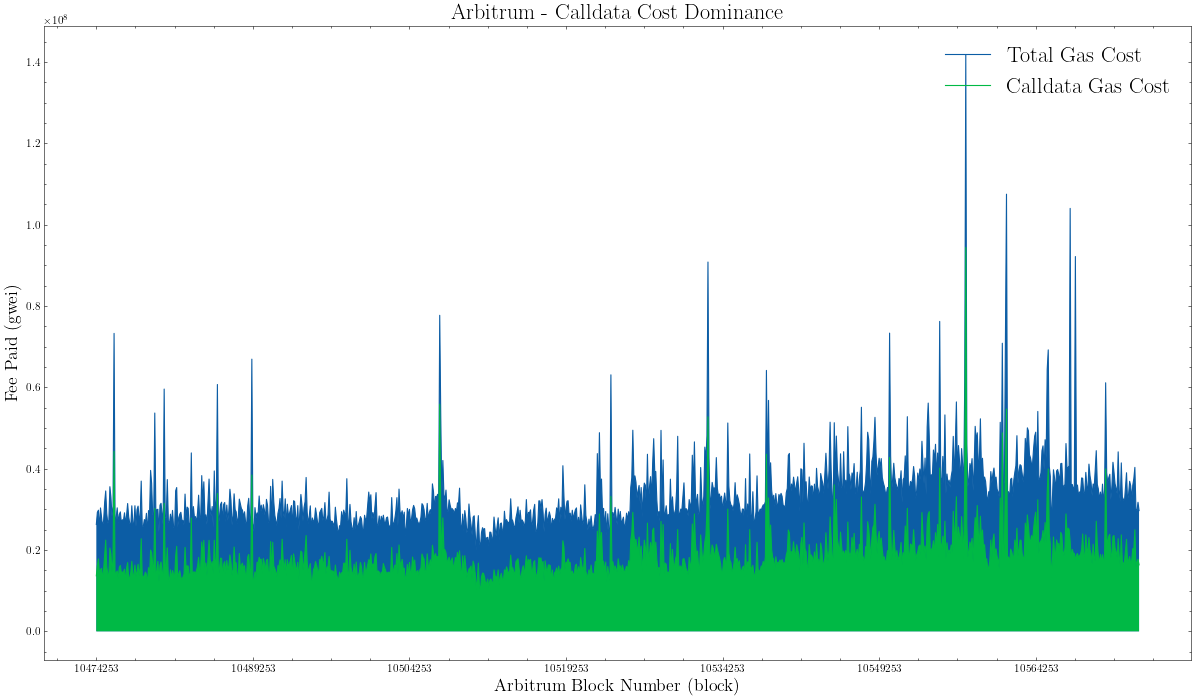

In [33]:
import matplotlib.pyplot as plt
import json
import numpy as np
import matplotlib
from matplotlib.pyplot import figure
matplotlib.rcParams['text.usetex'] = True
plt.style.use('science')

with open("../data/arbitrumPercentage1000.json", "r") as f:
    data = json.load(f)

#(blockNumber) -> timestamp, tx_count, fixed cost, calldata cost, storage cost, comptuation cost, percentage
x_ts = []
y_cd = []
y_total = []
percentage = []

for ts in data:
    x_ts.append(ts)
    y_cd.append(data[ts][3] /(10**9))
    y_total.append((data[ts][2] + data[ts][3] + data[ts][4] + data[ts][5])/(10 **9))
    percentage.append(((data[ts][3]/(data[ts][2] + data[ts][3] + data[ts][4] + data[ts][5]))*100))


print("Summary Statistics (Percentage)")
print("Mean:", np.mean(percentage))
print("Standard Deviation:", np.std(percentage))

fig,ax = plt.subplots(figsize=(18.5, 10.5), dpi=80)

# Plot the data
data_line = ax.plot(x_ts , y_total, label='Total Gas Cost')
plt.fill_between(x_ts, y_total)
# Plot the data
data_line = ax.plot(x_ts , y_cd, label='Calldata Gas Cost')
plt.fill_between(x_ts, y_cd)

# Make a legend
legend = ax.legend(loc='upper right', fontsize=20)

plt.title("Arbitrum - Calldata Cost Dominance", fontsize = 20)
plt.xlabel("Arbitrum Block Number (block)", fontsize=16)
plt.ylabel("Fee Paid (gwei)", fontsize=16)

ax.xaxis.set_major_locator(plt.MaxNLocator(9))

plt.show()
